# Feature Finding

## Centroids

In [1]:
from alpharaw.feature.centroids import *
import numpy as np

In [2]:
def test_find_centroid_connections():
    row_borders = np.array([3, 6, 9])
    rowwise_peaks = np.array([3, 3, 3])
    max_gap = 2

    score = np.full((3,3, max_gap), np.inf)
    connections = np.full((3,3, max_gap), -1)

    centroids = np.array([10, 20, 30, 10.2, 40.1, 40, 50, 60])
    centroid_tol = 0.5*1e6

    from_r, from_c, to_r, to_c, score_median, score_std = find_centroid_connections(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

    assert np.allclose(from_r, np.array([0, 0, 1, 1])) #e.g. 0,0 is connected to 0,1 -> 10 to 10.2
    assert np.allclose(from_c, np.array([0, 2, 1, 2]))
    assert np.allclose(to_r, np.array([1, 1, 2, 2]))
    assert np.allclose(to_c, np.array([0, 1, 0, 0]))

test_find_centroid_connections()

100%|██████████| 3/3 [00:00<00:00, 90524.55it/s]

100%|██████████| 5/5 [00:00<00:00, 142663.40it/s]

Centroid Connections from [0 1 2 3] to [3 4 6 5]


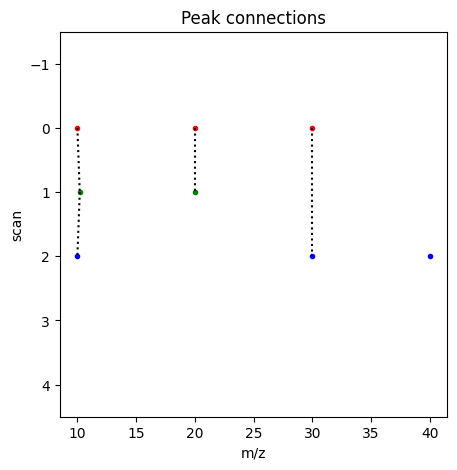

In [3]:
#Sample snippet to show centroid conncetions

import matplotlib.pyplot as plt

row_borders = np.array([3, 5, 7])
rowwise_peaks = np.array([3, 2, 3])
max_gap = 2

score = np.full((3,3, max_gap), np.inf)
connections = np.full((3,3, max_gap), -1)

centroids = np.array([10, 20, 30,
                      10.2, 20,
                      10, 30, 40])

centroid_tol = 0.5*1e5

from_idx, to_idx, score_median, score_std = connect_centroids(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

scan_no = np.array([0, 0, 0,
                    1, 1,
                    2, 2, 2])

print(f'Centroid Connections from {from_idx} to {to_idx}')

plt.figure(figsize=(5,5))

colors = ['r','g','b']

for x,y in zip(centroids, scan_no):
    plt.plot(x, y, '.', color=colors[y])

for i, _ in enumerate(from_idx):
    from_ = _
    to_ = to_idx[i]
    plt.plot([centroids[from_], centroids[to_]], [scan_no[from_], scan_no[to_]], 'k:')
    
plt.ylabel('scan')
plt.xlabel('m/z')
plt.ylim(len(row_borders)+1.5, -1.5)
plt.title('Peak connections')
plt.show()
     

In [4]:
def test_connect_centroids():
    row_borders = np.array([3, 6, 9])
    rowwise_peaks = np.array([3, 3, 3])
    max_gap = 2

    score = np.full((3,3, max_gap), np.inf)
    connections = np.full((3,3, max_gap), -1)

    centroids = np.array([10, 20, 30, 10.2, 20, 10, 30, 40])
    centroid_tol = 0.5*1e5

    from_idx, to_idx, score_median, score_std = connect_centroids(rowwise_peaks, row_borders, centroids, max_gap, centroid_tol)

    assert np.allclose(from_idx, np.array([0, 1, 2]))
    assert np.allclose(to_idx, np.array([3, 4, 6]))

test_connect_centroids()

100%|██████████| 3/3 [00:00<00:00, 73156.47it/s]


## Hills 

In [5]:
from alpharaw.feature.hills import *

In [6]:
def test_fast_minima():
    assert fast_minima(np.array([3,2,1,0,1,2,3])) == 3
    assert fast_minima(np.array([4,3,2,1,0,1,2])) == 4
    assert len(fast_minima(np.array([5,4,3,2,1,0,1]))) == 0
    assert len(fast_minima(np.array([6,5,4,3,2,1,0]))) == 0

test_fast_minima()

## Isotope Patterns

In [7]:
from alpharaw.feature.isotope_pattern import *

(array([300.18252563, 301.18539427, 302.18826291, 303.19113155,
       304.19400019, 305.19686883]), array([1.00000000e+00, 1.59501684e-01, 2.01508986e-02, 1.86370995e-03,
       1.39934810e-04, 8.55900106e-06]))


In [8]:
def test_check_isotope_pattern():
    charge = 1

    mass1, delta_mass1 = 100, 0.1
    mass2, delta_mass2 = 101.1, 0.05

    assert check_isotope_pattern(mass1, mass2, delta_mass1, delta_mass2, charge) == True

    mass2, delta_mass2 = 102.1, 0.05

    assert check_isotope_pattern(mass1, mass2, delta_mass1, delta_mass2, charge) == False

test_check_isotope_pattern()

## Wrapper

In [9]:
#using file from https://datashare.biochem.mpg.de/s/PQl8nyqfHVZZHte

file_path = './HeLa_500ng.raw.hdf'

from alpharaw.ms_data_base import MSData_Base
msdata = MSData_Base()
msdata.load_hdf(file_path)


In [13]:
from alpharaw.feature.finding import find
#from alphatims.utils import set_threads

#set_threads(20)

import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

spectrum_df = msdata.spectrum_df
peak_df = msdata.peak_df

preview = 1000
spectrum_df_ = spectrum_df.iloc[:preview]
msdata_df_ = msdata.peak_df.iloc[:spectrum_df.iloc[:preview]['peak_stop_idx'].iloc[-1]]

feature_df = find(spectrum_df_, msdata_df_)

display(feature_df)

INFO:root:FF started
INFO:root:Hill extraction with centroid_tol 8 and max_gap 2
100%|██████████| 30485/30485 [00:00<00:00, 1625271.47it/s]
INFO:root:Number of hills 30,486, len = 20.67
INFO:root:Repeating hill extraction with centroid_tol 4.82
100%|██████████| 36001/36001 [00:00<00:00, 1691317.54it/s]
INFO:root:Number of hills 36,002, len = 21.85
INFO:root:After duplicate removal of hills 30,277
100%|██████████| 8/8 [00:00<00:00, 1180.45it/s]
INFO:root:After split hill_ptrs 43,063
100%|██████████| 2248/2248 [00:06<00:00, 369.49it/s]
INFO:root:After filter hill_ptrs 41,124
100%|██████████| 41123/41123 [01:54<00:00, 360.67it/s]
INFO:root:Extracting hill stats complete
100%|██████████| 32572/32572 [00:00<00:00, 40010.56it/s]
INFO:root:Found 4,197 pre isotope patterns.
INFO:root:Extracted 3,120 isotope patterns.
100%|██████████| 3120/3120 [00:00<00:00, 4645.08it/s]
INFO:root:FF finished.


,mz,mz_std,mz_most_abundant,charge,rt_start,rt_apex,rt_end,fwhm,n_isotopes,mass,ms1_int_sum_apex,ms1_int_sum_area,ms1_int_max_apex,ms1_int_max_area,last_isotope_mz
0,326.878976,0.000119,327.077245,5.0,2.941005,2.971523,3.031541,0.059002,2.0,1629.358500,5.891016e+05,39208.536472,4.207241e+05,33735.471305,327.077245
1,327.879481,0.000122,327.879481,5.0,3.052135,3.071579,3.118244,0.035971,2.0,1634.361024,1.476344e+05,5334.644428,8.883707e+04,4163.260490,328.080810
2,320.870754,0.000068,320.870754,3.0,3.161699,3.213387,3.237078,0.079686,2.0,959.590433,6.685631e+04,3081.041841,4.348607e+04,2647.372089,321.205716
3,448.819379,0.000149,448.819379,1.0,3.041441,3.129566,3.273503,0.108688,4.0,447.812102,4.420755e+05,54972.333429,2.032204e+05,30560.189504,451.827958
4,443.804608,0.000068,443.804608,3.0,3.041441,3.044378,3.323441,0.058750,2.0,1328.391996,1.169377e+06,92668.026428,1.080082e+06,62282.387775,444.140920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,371.315446,0.000062,371.315446,1.0,3.304921,3.324523,3.332254,0.023191,2.0,370.308169,4.888646e+05,9317.766825,3.978778e+05,7444.810280,372.318736
3116,425.861201,0.000191,425.861201,2.0,3.308953,3.320486,3.332254,0.019534,2.0,849.707850,4.278825e+04,763.268662,1.895084e+04,409.649413,426.365790
3117,313.273618,0.000114,313.273618,1.0,3.308953,3.324487,3.332254,0.022829,2.0,312.266341,7.261911e+04,1305.784416,6.094174e+04,1102.110996,314.276913
3118,447.346265,0.000161,447.346265,1.0,3.308953,3.328488,3.332254,0.023300,2.0,446.338989,1.145159e+05,2076.826953,9.244021e+04,1565.038367,448.349896
